In [1]:
import pandas as pd
df=pd.read_csv("d:/data/zoo/zoo.csv")
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
1,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
2,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
3,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
4,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2


In [2]:
train_cols=df.columns[1:17]
X=df[train_cols]
y=df["class_type"]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=1000)

In [7]:
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [8]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.95
0.7619047619047619


In [9]:
#변수의 단위가 다르므로 스케일링
min_on_training=X_train.min(axis=0)
range_on_training=(X_train - min_on_training).max(axis=0)
X_train_scaled=(X_train - min_on_training) / range_on_training
X_test_scaled=(X_test - min_on_training) / range_on_training

In [10]:
from sklearn.svm import SVC
model=SVC(random_state=10)
model.fit(X_train_scaled,y_train)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled,y_test))

0.8875
0.6190476190476191


최적의 C: 10
최적의 gamma: 0.1
최적의 정확도: 0.9523809523809523


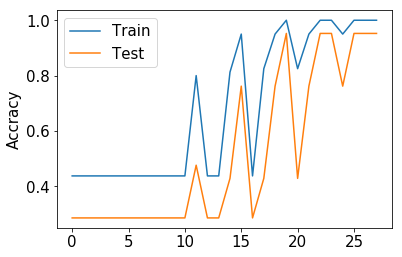

In [13]:
#C,gamma value 최적화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
train_rate=[] #학습용 데이터셋의 정확도를 저장할 리스트
test_rate=[]
c_values=[0.001,0.01,0.1,1,10,100,1000] #튜닝할 값들
g_values=[0.0001,0.001,0.01,0.1]
for n in c_values:
    for g in g_values:
        model=SVC(C=n,gamma=g,random_state=10) #svm 모형 생성
        model.fit(X_train,y_train)
        #산출된 정확도값을 리스트에 추가
        train_rate.append([n,g,model.score(X_train,y_train)])
        test_rate.append([n,g,model.score(X_test,y_test)])
        
train_arr=np.array(train_rate) #리스트를 넘파이 배열로 변환
test_arr=np.array(test_rate)
max_rate=np.max(test_arr[:,2]) #가장 높은 정확도
idx=np.where(test_arr == max_rate)[0][0] #인덱스 조회
print("최적의 C:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최적의 정확도:",test_rate[idx][2])

plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)),train_arr[:,2],label="Train")
plt.plot(range(len(test_rate)),test_arr[:,2],label="Test")
plt.ylabel("Accracy")
plt.legend()

In [14]:
model=SVC(C=10,gamma=0.1,random_state=10)
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001,
    verbose=False)

In [16]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9523809523809523
